# Вариант 2
## Ильин

<div><img src="./Ильин.png" width="450"/></div>

In [1]:
import numpy as np
#Функция для создания синусоиды
def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k,c,m1,m2,m3,m4,h1,h2,l1,l2,a1,a2,I1,I2,L,A,v,delta_t=0.002,gamma = 0.5,betta = 0.25):
    #Создаем матрицу коэффициентов упругости
    v = v*1000/3600
    T = round((l1+l2+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l2-l2)/v,(l2+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag(k)
    D = np.array([[-1,h1,1,-a1,0,0],
    [-1,-h2,1,a2,0,0],
    [1,-l1,0,0,-1,0],
    [1,l2,0,0,0,-1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,-l1,0,0,-1,0],
    [1,l2,0,0,0,-1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,I2,m3,m4])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt

In [2]:
X,X_t,X_tt = solve([8*10**6,3*10**7,8*10**5,9*10**5,8*10**5,8*10**5],[0,0,7*10**3,7*10**3,9*10**3,9*10**3],2700,1900,300,450,0.7,1.9,2,2.2,1.5,1.1,12000,8500,1.2,0.25,25)

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,390
0,0.0,5.542680e-08,4.462489e-07,1.851651e-06,5.410956e-06,1.271335e-05,2.576934e-05,4.696829e-05,7.902683e-05,1.249325e-04,...,0.147283,0.147186,0.147042,0.146849,0.146606,0.146311,0.145963,0.145559,0.145098,0.144576
1,0.0,-2.507805e-08,-2.024226e-07,-8.428706e-07,-2.474115e-06,-5.844337e-06,-1.191853e-05,-2.186739e-05,-3.704885e-05,-5.898244e-05,...,0.020019,0.022213,0.024416,0.026625,0.028839,0.031059,0.033281,0.035506,0.037729,0.039950
2,0.0,4.224707e-10,5.047691e-09,3.049301e-08,1.256907e-07,4.016062e-07,1.068418e-06,2.475914e-06,5.152462e-06,9.838212e-06,...,0.164148,0.165708,0.167234,0.168725,0.170177,0.171589,0.172959,0.174282,0.175558,0.176782
3,0.0,-7.340852e-11,-8.911205e-10,-5.493155e-09,-2.321379e-08,-7.640964e-08,-2.103815e-07,-5.067393e-07,-1.100293e-06,-2.199292e-06,...,0.019223,0.021621,0.024027,0.026436,0.028844,0.031247,0.033641,0.036023,0.038388,0.040733
4,0.0,1.939495e-05,1.140174e-04,3.519261e-04,7.913869e-04,1.480674e-03,2.458098e-03,3.752244e-03,5.382381e-03,7.359025e-03,...,0.056310,0.053978,0.051629,0.049264,0.046883,0.044486,0.042072,0.039640,0.037191,0.034723
5,0.0,4.308730e-12,2.476695e-11,-1.325495e-12,-5.900203e-10,-3.654212e-09,-1.421698e-08,-4.296242e-08,-1.095171e-07,-2.461692e-07,...,0.194085,0.194600,0.195014,0.195322,0.195519,0.195603,0.195571,0.195419,0.194945,0.193770


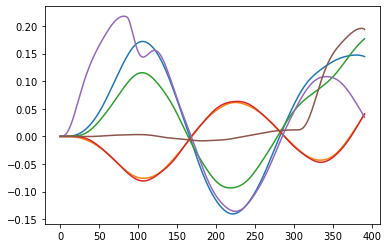

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

for i in range(len(X)):
    plt.plot(X[i])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,390
0,0.0,5.542680e-05,3.353953e-04,1.070007e-03,2.489298e-03,0.004813,0.008243,0.012956,0.019102,0.026803,...,-0.037333,-0.060049,-0.083882,-0.108691,-0.134354,-0.160790,-0.187961,-0.215865,-0.245107,-0.276867
1,0.0,-2.507805e-05,-1.522665e-04,-4.881814e-04,-1.143063e-03,-0.002227,-0.003847,-0.006102,-0.009080,-0.012854,...,1.094989,1.099212,1.102905,1.106068,1.108672,1.110657,1.111933,1.112382,1.111581,1.108808
2,0.0,4.224707e-07,4.202750e-06,2.124257e-05,7.395512e-05,0.000202,0.000465,0.000943,0.001734,0.002952,...,0.788348,0.771668,0.754283,0.735962,0.716505,0.695764,0.673655,0.650149,0.625241,0.598851
3,0.0,-7.340852e-08,-7.443035e-07,-3.857731e-06,-1.386291e-05,-0.000039,-0.000095,-0.000202,-0.000392,-0.000707,...,1.196494,1.201406,1.204186,1.204823,1.203344,1.199811,1.194324,1.187014,1.178033,1.167533
4,0.0,1.939495e-02,7.522748e-02,1.626812e-01,2.767796e-01,0.412507,0.564917,0.729229,0.900908,1.075735,...,-1.161744,-1.170230,-1.178410,-1.186463,-1.194546,-1.202788,-1.211285,-1.220106,-1.229284,-1.238818
5,0.0,4.308730e-09,1.614948e-08,-4.224192e-08,-5.464529e-07,-0.000003,-0.000008,-0.000021,-0.000046,-0.000091,...,0.282601,0.232829,0.180789,0.126685,0.070748,0.013220,-0.045648,-0.105607,-0.368743,-0.806434


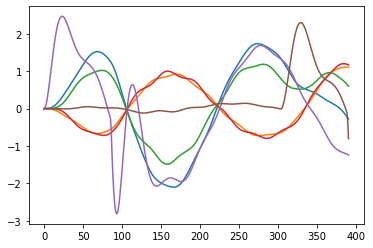

In [4]:
for i in range(len(X)):
    plt.plot(X_t[i])
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,390
0,0.0,0.055427,0.224542,0.510070,0.909221,1.414577,2.015220,2.697951,3.448456,4.252302,...,-11.059492,-11.656006,-12.177382,-12.630848,-13.032596,-13.403884,-13.766441,-14.137969,-15.103702,-16.656004
1,0.0,-0.025078,-0.102110,-0.233805,-0.421077,-0.663018,-0.956855,-1.297946,-1.679849,-2.094479,...,2.245629,1.977276,1.715454,1.447104,1.156831,0.828563,0.447426,0.001543,-0.802769,-1.969626
2,0.0,0.000422,0.003358,0.013682,0.039031,0.088975,0.173916,0.303878,0.487380,0.730564,...,-8.193907,-8.486039,-8.898728,-9.422444,-10.034719,-10.705493,-11.403498,-12.102594,-12.805800,-13.584417
3,0.0,-0.000073,-0.000597,-0.002516,-0.007489,-0.017981,-0.037325,-0.069755,-0.120361,-0.194970,...,2.985604,1.926358,0.853345,-0.216112,-1.263314,-2.269515,-3.217393,-4.092464,-4.887988,-5.612923
4,0.0,19.394947,36.437581,51.016151,63.082268,72.645116,79.765054,84.546808,87.132443,87.694313,...,-4.343237,-4.142652,-4.037194,-4.016183,-4.066765,-4.174427,-4.323485,-4.497543,-4.679968,-4.853966
5,0.0,0.000004,0.000008,-0.000066,-0.000438,-0.001533,-0.003994,-0.008661,-0.016493,-0.028451,...,-24.294190,-25.477424,-26.563439,-27.539863,-28.397421,-29.130553,-29.737735,-30.221441,-232.914525,-204.775797


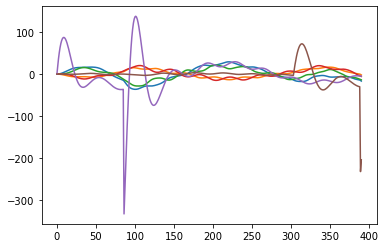

In [5]:
for i in range(len(X)):
    plt.plot(X_tt[i])
pd.DataFrame(X_tt)